In [ ]:
# Load the dataset
housing = fetch_california_housing()

# Create a pandas DataFrame
# The data is in housing.data, and the feature names are in housing.feature_names
df = pd.DataFrame(housing.data, columns=housing.feature_names)

# The target variable (median house value) is in housing.target
df['MedHouseVal'] = housing.target

# Display the description of the dataset
print(housing.DESCR)

# Display the first 5 rows of the DataFrame
print("\nFirst 5 rows of the dataset:")
df.head()

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import Scikit-learn functions
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Set some visualization options for better plots
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [ ]:
# Get a concise summary of the dataframe
print("DataFrame Info:")
df.info()

# Check for any missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Get descriptive statistics for each column
print("\nDescriptive Statistics:")
df.describe()

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB

Missing values in each column:
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

Descriptive Statistics:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


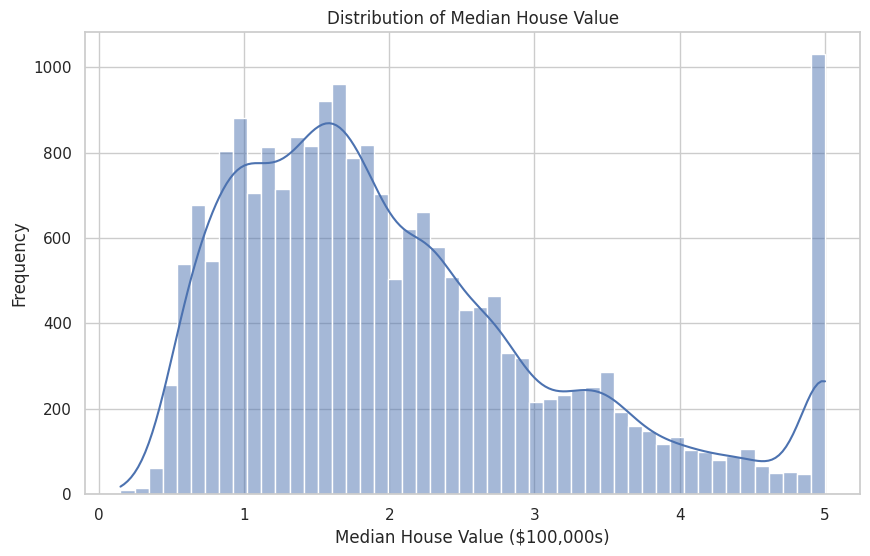

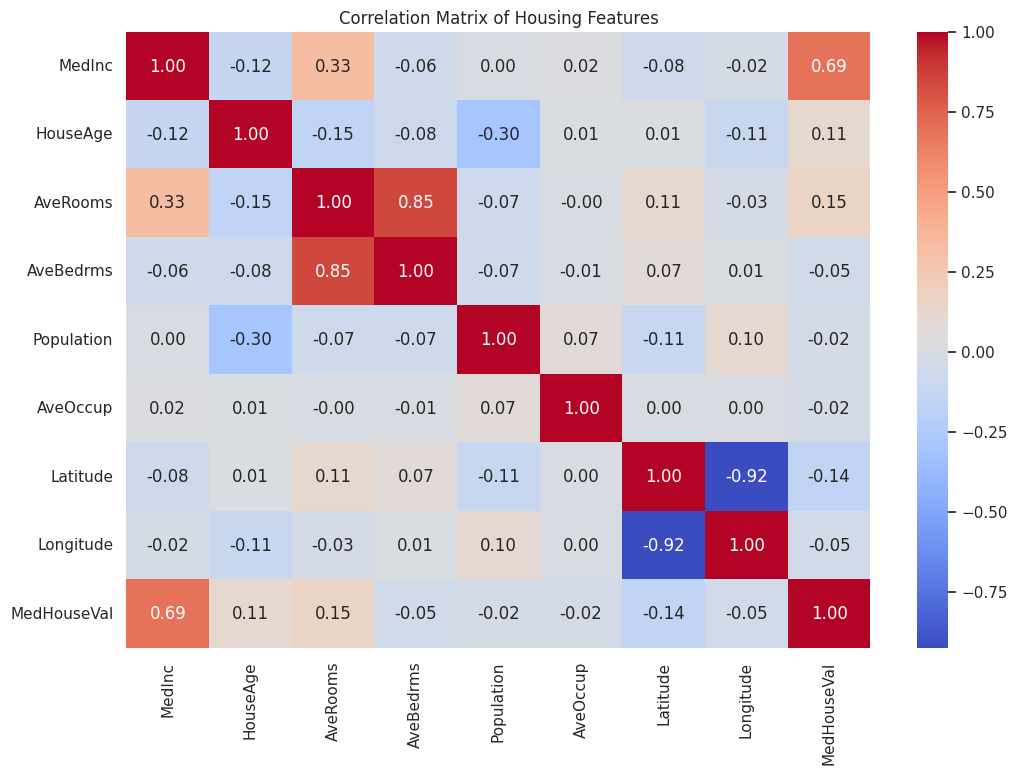

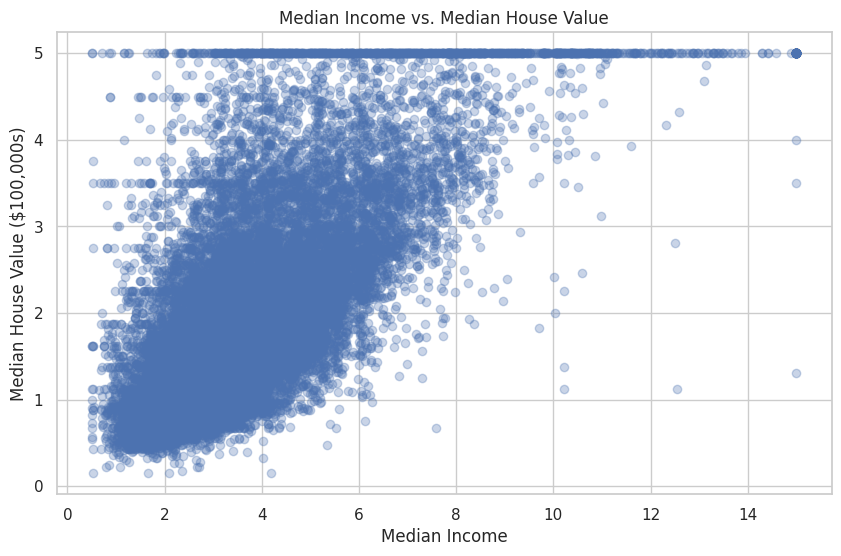

In [ ]:
# Visualize the distribution of the target variable (Median House Value)
plt.figure(figsize=(10, 6))
sns.histplot(df['MedHouseVal'], bins=50, kde=True)
plt.title('Distribution of Median House Value')
plt.xlabel('Median House Value ($100,000s)')
plt.ylabel('Frequency')
plt.show()

# Visualize the correlation between features using a heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Housing Features')
plt.show()

# Scatter plot to see the relationship between Median Income and Median House Value
plt.figure(figsize=(10, 6))
plt.scatter(df['MedInc'], df['MedHouseVal'], alpha=0.3)
plt.title('Median Income vs. Median House Value')
plt.xlabel('Median Income')
plt.ylabel('Median House Value ($100,000s)')
plt.show()

In [ ]:
# Get a concise summary of the dataframe
print("DataFrame Info:")
df.info()

# Check for any missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Get descriptive statistics for each column
print("\nDescriptive Statistics:")
df.describe()

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB

Missing values in each column:
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

Descriptive Statistics:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [ ]:
# 1. Separate features and target
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

# 2. Split data into training and testing sets
# We use 80% for training and 20% for testing.
# random_state ensures we get the same split every time we run the code.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Scale the features
# We fit the scaler ONLY on the training data to avoid data leakage from the test set.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display the shape of the datasets
print("X_train shape:", X_train_scaled.shape)
print("X_test shape:", X_test_scaled.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (16512, 8)
X_test shape: (4128, 8)
y_train shape: (16512,)
y_test shape: (4128,)


In [ ]:
# --- Model 1: Linear Regression ---
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
print("Linear Regression model trained.")

# --- Model 2: Random Forest Regressor ---
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
print("Random Forest Regressor model trained.")

Linear Regression model trained.
Random Forest Regressor model trained.


In [ ]:
# Make predictions on the test set
y_pred_lr = lr_model.predict(X_test_scaled)
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the Linear Regression model
print("\n--- Linear Regression Evaluation ---")
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"Mean Absolute Error (MAE): {mae_lr:.4f}")
print(f"Mean Squared Error (MSE): {mse_lr:.4f}")
print(f"R-squared (R²): {r2_lr:.4f}")

# Evaluate the Random Forest model
print("\n--- Random Forest Regressor Evaluation ---")
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Mean Absolute Error (MAE): {mae_rf:.4f}")
print(f"Mean Squared Error (MSE): {mse_rf:.4f}")
print(f"R-squared (R²): {r2_rf:.4f}")


--- Linear Regression Evaluation ---
Mean Absolute Error (MAE): 0.5332
Mean Squared Error (MSE): 0.5559
R-squared (R²): 0.5758

--- Random Forest Regressor Evaluation ---
Mean Absolute Error (MAE): 0.3274
Mean Squared Error (MSE): 0.2552
R-squared (R²): 0.8053


In [ ]:
# Let's create a sample data point for a new district.
# The features are in this order:
# MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude
new_data = np.array([[
    5.5,      # Median income of 5.5
    25,       # House age of 25 years
    6,        # Average 6 rooms
    1,        # Average 1 bedroom
    1200,     # Population of 1200
    2.5,      # Average occupancy of 2.5
    34.05,    # Latitude (e.g., Los Angeles area)
    -118.25   # Longitude (e.g., Los Angeles area)
]])

# Scale the new data using the SAME scaler fitted on the training data
new_data_scaled = scaler.transform(new_data)

# Predict the house value using our best model (Random Forest)
predicted_price_unit = rf_model.predict(new_data_scaled)

# The model predicts in units of $100,000, so we multiply by 100,000 for the actual price
predicted_price = predicted_price_unit[0] * 100000

# Print the final prediction
print("\n--- Final Prediction for a New District ---")
print(f"Features of the new district:\n{new_data[0]}")
print(f"\nPredicted Median House Value: ${predicted_price:,.2f}")


--- Final Prediction for a New District ---
Features of the new district:
[ 5.5000e+00  2.5000e+01  6.0000e+00  1.0000e+00  1.2000e+03  2.5000e+00
  3.4050e+01 -1.1825e+02]

Predicted Median House Value: $348,676.03


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
